## Importing all the necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing import image 

## Getting the tomato dataset

In [2]:
dataset_directory_location = 'tomato_dataset'

## Listing the directories present inside tomato dataset

In [3]:
os.listdir(dataset_directory_location)

['test', 'train']

## Getting the training and testing directory location

In [4]:
train_dataset_location = os.path.join(dataset_directory_location, 'train')
test_dataset_location = os.path.join(dataset_directory_location, 'test')

## Listing all the directories present inside 'train' and 'test' directory respectively

In [5]:
os.listdir(train_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [6]:
os.listdir(test_dataset_location)

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

## Viewing a 'tomato image with bacterial spot image'

In [7]:
tomato_bacterial_spot_img = os.path.join(train_dataset_location, 'Tomato___Bacterial_spot')

In [8]:
os.listdir(tomato_bacterial_spot_img)[:1]

['00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG']

In [9]:
tomato_bacterial_spot_img_read = imread(os.path.join(tomato_bacterial_spot_img, '00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'))

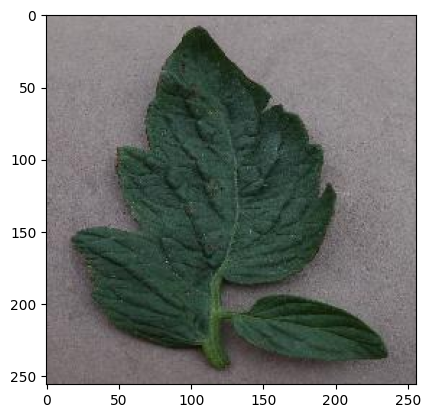

In [10]:
plt.imshow(tomato_bacterial_spot_img_read)

## Getting the shape of the image

In [11]:
tomato_bacterial_spot_img_read.shape

(256, 256, 3)

## Setting the right image shape of the image for our use case

In [12]:
correct_image_shape = (224, 224, 3)

In [13]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest',
                               rescale=1./255)

In [14]:
train_image_gen = image_gen.flow_from_directory(train_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

test_image_gen = image_gen.flow_from_directory(test_dataset_location, 
                                                target_size=correct_image_shape[:2], 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='categorical')

Found 10001 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Creating and training the model

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=correct_image_shape, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 32)     128       
 hNormalization)                                                 
                                                        

In [18]:
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(learning_rate=2e-5), metrics=['accuracy'])

In [19]:
model.fit(train_image_gen, validation_data=test_image_gen, epochs=30)

Epoch 1/30
626/626 [==============================] - 197s 275ms/step - loss: 1.8982 - accuracy: 0.3758 - val_loss: 1.7435 - val_accuracy: 0.4100
Epoch 2/30
626/626 [==============================] - 163s 260ms/step - loss: 1.3486 - accuracy: 0.5663 - val_loss: 1.0341 - val_accuracy: 0.6730
Epoch 3/30
626/626 [==============================] - 172s 274ms/step - loss: 1.1273 - accuracy: 0.6399 - val_loss: 0.8900 - val_accuracy: 0.7360
Epoch 4/30
626/626 [==============================] - 170s 271ms/step - loss: 0.9960 - accuracy: 0.6894 - val_loss: 0.7681 - val_accuracy: 0.7670
Epoch 5/30
626/626 [==============================] - 164s 261ms/step - loss: 0.9134 - accuracy: 0.7148 - val_loss: 0.6815 - val_accuracy: 0.8140
Epoch 6/30
626/626 [==============================] - 149s 237ms/step - loss: 0.8422 - accuracy: 0.7427 - val_loss: 0.6300 - val_accuracy: 0.8250
Epoch 7/30
626/626 [==============================] - 145s 232ms/step - loss: 0.7892 - accuracy: 0.7567 - val_loss: 0.5604 -

In [20]:
history_df = pd.DataFrame(model.history.history)

<Axes: >

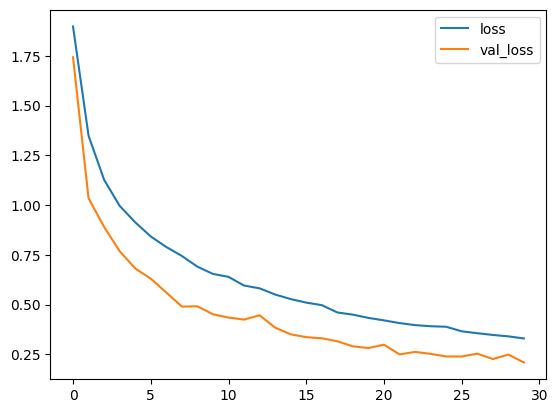

In [21]:
history_df[['loss', 'val_loss']].plot()

<Axes: >

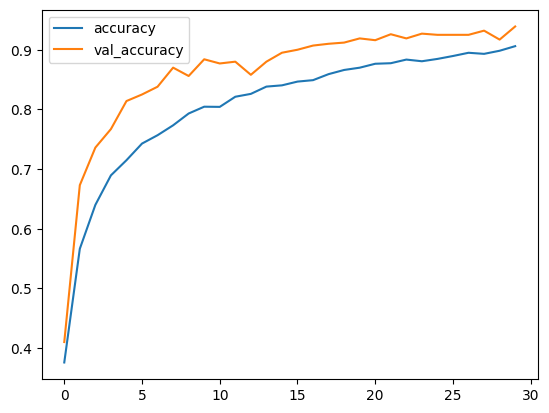

In [22]:
history_df[['accuracy', 'val_accuracy']].plot()

## Calculating the accuracy on training and testing data

In [23]:
model.evaluate(train_image_gen)[1]

626/626 [==============================] - 132s 211ms/step - loss: 0.1553 - accuracy: 0.9602


0.960204005241394

In [24]:
model.evaluate(test_image_gen)[1]

63/63 [==============================] - 14s 219ms/step - loss: 0.2133 - accuracy: 0.9370


0.9369999766349792

## Making prediction on sample data

In [25]:
sample_img_load = image.load_img('./tomato_dataset/test/Tomato___Tomato_mosaic_virus/01b32f27-2b9b-4961-805b-8066bf4d90f1___PSU_CG_2417.JPG_02358efc-6cd3-441a-83a7-2040d9c828b9.JPG', target_size=correct_image_shape)

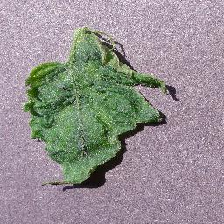

In [26]:
sample_img_load

In [27]:
sample_img_to_arr = image.img_to_array(sample_img_load) / 255

In [28]:
sample_img_to_arr_expand_dim = np.expand_dims(sample_img_to_arr, 0) 

In [29]:
prediction = model.predict(sample_img_to_arr_expand_dim)[0]

1/1 [==============================] - 1s 522ms/step


In [30]:
pred_result = np.argmax(prediction)

In [31]:
class_names = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [32]:
pred_final_result = class_names[pred_result]

In [33]:
pred_final_result

'Tomato___Early_blight'

## Save the model

In [34]:
save_model(model, 'cnnfromscratch_model')

INFO:tensorflow:Assets written to: cnnfromscratch_model\assets


INFO:tensorflow:Assets written to: cnnfromscratch_model\assets
